In [1]:
using DataFrames
using CSV
using Compat.Printf
using Plots
using IJulia
gr() # Plots.GRBackend()

┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:789
┌ Info: Recompiling stale cache file C:\Users\aless\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:789


Plots.GRBackend()

In [ ]:
csv = CSV.File("kart2.txt";normalizenames=true)
df = csv |> DataFrame
names(df)[1]

In [4]:
size(df)

UndefVarError: UndefVarError: df not defined

In [27]:
tab = zeros(size(df))
for r in 1:size(df)[1]
    for c in 1:size(df)[2]
        tab[r, c] = df[r,c]
    end
end

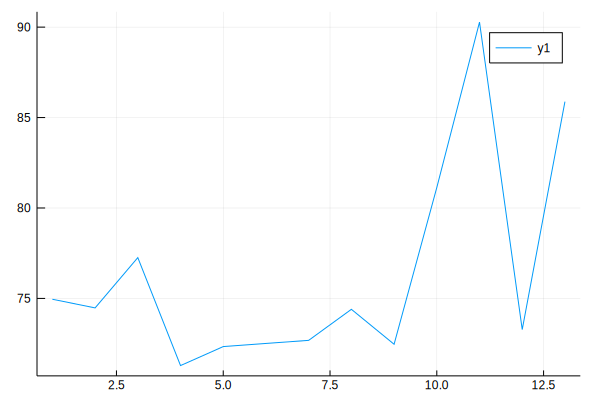

In [42]:
plot(tab[2,3:15])

In [38]:
tab[2:3]

2-element Array{Float64,1}:
 69.142
 63.86 

In [6]:
ctab = zeros(size(df))
ctab[1,:] = tab[1,:]
for r in 2:size(df)[1]
    for c in 1:size(df)[2]
        ctab[r, c] = ctab[r-1, c] + df[r,c]
    end
end

In [7]:
plot(ctab,legend=:topleft)
ctab

15×18 Array{Float64,2}:
   5.148    9.568    8.72     7.284  …    9.961   12.346   11.164    12.451
  74.29    80.749   83.673   81.759      95.841   86.85    85.767   103.667
 138.15   145.956  149.55   147.247     162.387  169.49   153.843   175.319
 202.127  211.304  214.907  212.944     229.691  239.068  231.652   246.682
 265.843  275.925  280.822  278.671     296.208  307.558  309.691   319.119
 329.388  341.062  346.19   343.718  …  362.661  375.358  376.63    389.311
 392.773  406.933  411.556  408.445     429.063  443.222  444.344   459.415
 456.639  483.205  477.939  473.686     495.458  511.475  512.148   529.442
 519.726  547.652  543.057  539.927     572.979  579.551  580.073   611.11 
 583.445  611.993  609.882  605.945     639.37   647.581  647.086   680.056
 647.759  676.047  675.522  671.285  …  705.172  715.924  716.507   751.405
 712.666  741.88   741.343  743.177     771.172  783.542  784.127   820.014
 776.171  807.366  807.718  808.058     837.534  851.71   852.29

In [12]:
dtab = zeros(size(df))
for r in 1:size(df)[1]
    for c in 1:size(df)[2]
        dtab[r, c] = ctab[r, c] - ctab[r, 2]
    end
end

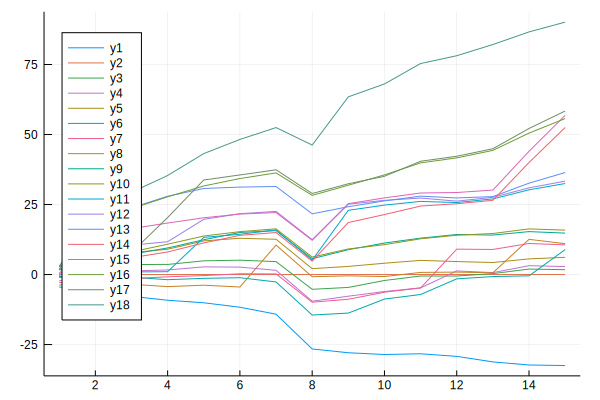

In [13]:
plot(dtab,legend=:topleft)

In [7]:
function lookup(t, data)
    i = 1
    while (data[i]<t && i<=length(data))
        # @printf("%d %f\n", i, data[i])
        i = i+1
    end
    turn = i-1
    if (i>1)
        rem = (t-data[i-1])/(data[i]-data[i-1])
    else
        rem = (t)/(data[i])
    end
    return turn + rem, data[i]
end

lookup (generic function with 1 method)

In [9]:
lookup(500, ctab[:,1])

8.687320684134608

In [26]:
for t in 1:.5:905
    plot()
    v = Array{Tuple{Float64,String,Float64},1}
    for kart in 1:size(df)[2]
        p, lt = lookup(t, ctab[:,kart])
        x = 4.5*sin(2π*p)
        y = 3.5*cos(2π*p)
        scatter!([x],[y], m=8, label=names(df)[kart])
        if (kart == 1)
            v = [(p, String(names(df)[kart]), lt)]
        else
            append!(v, [(p, String(names(df)[kart]), lt)])
        end
    end
    s = sort!(v, by = x -> x[1], rev = true)
    for kart in 1:size(df)[2]
        dt = 0
        if (kart > 1)
            dt = s[kart][3]*(s[kart-1][1] - s[kart][1])
        end
        str = s[kart][2]
        str = "$kart: $str $(@sprintf("%.2f", dt))"
        annotate!([(-6.5, 6-kart/2, text(str, 8, :left))])
    end
    lap = Int64(floor(s[1][1]))
    annotate!([(-6, 7, text("LAP $lap", 14, :center))])
    plot!(size = (1000,500), lims = (-6, 8), grid=false, xaxis=false, yaxis=false) |> IJulia.display
    IJulia.clear_output(true)
    # sleep(0.05)
end

InterruptException: InterruptException:

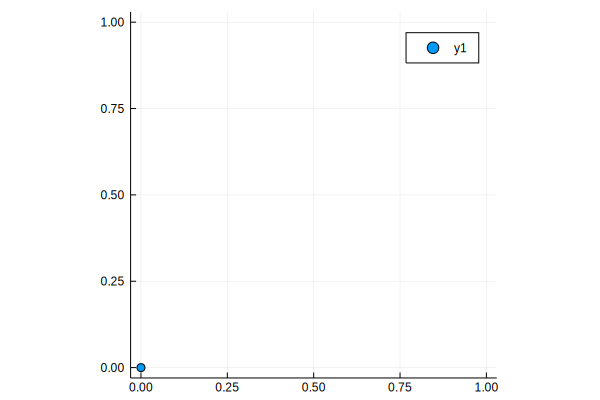

In [100]:
plot()
scatter!([0], [0], aspect_ratio=:equal, m=4)

In [28]:
anim = @animate for t in 1:.5:905
    plot()
    v = Array{Tuple{Float64,String},1}
    for kart in 1:size(df)[2]
        p, lt = lookup(t, ctab[:,kart])
        x = 4.5*sin(2π*p)
        y = 3.5*cos(2π*p)
        scatter!([x],[y], m=8, label=names(df)[kart])
        if (kart == 1)
            v = [(p, String(names(df)[kart]), lt)]
        else
            append!(v, [(p, String(names(df)[kart]), lt)])
        end
    end
    s = sort!(v, by = x -> x[1], rev = true)
    for kart in 1:size(df)[2]
        dt = 0
        if (kart > 1)
            dt = s[kart][3]*(s[kart-1][1] - s[kart][1])
        end
        str = s[kart][2]
        str = "$kart: $str $(@sprintf("%.2f", dt))"
        annotate!([(-6.5, 6-kart/2, text(str, 8, :left))])
    end
    lap = Int64(floor(s[1][1]))
    annotate!([(-6, 7, text("LAP $lap", 14, :center))])
    plot!(size = (1000,500), lims = (-6, 8), grid=false, xaxis=false, yaxis=false)
end
gif(anim, "race.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /mnt/juliabox/julia/julia-experiments/dataframes/race.gif
└ @ Plots /home/jrun/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/mnt/juliabox/julia/julia-experiments/dataframes/race.gif")

In [53]:
v = Array{Tuple{Int64,String},1}
v = [(1, "c"), (3, "a"), (2, "b")]
append!(v, [(6, "d")])

4-element Array{Tuple{Int64,String},1}:
 (1, "c")
 (3, "a")
 (2, "b")
 (6, "d")

In [54]:
sort!(v, by = x -> x[1])
v

4-element Array{Tuple{Int64,String},1}:
 (1, "c")
 (2, "b")
 (3, "a")
 (6, "d")

In [72]:
v = Array{Tuple{Float64,String},1}
v = [(.1, "c"), (.3, "a"), (.2, "b")]
#append!(v, [(6, "d")])
for i in 1:3
    append!(v, [(1/i, String(names(df)[i]))])
end